# Email spam Detection with Machine Learning


We have all encountered unwanted spam emails in our inboxes at some point. Spam emails, also known as junk mail, are emails that are sent to a large number of recipients simultaneously, often containing unclear messages, fraudulent schemes, or, most dangerously, phishing attempts.

In this project, we will utilize Python to create a spam email detection system. Our objective is to train a machine learning model capable of identifying and categorizing emails as either spam or legitimate (ham). By doing so, we aim to efficiently separate undesirable and potentially harmful emails from our inbox.

We will follow the standard data science workflow, which includes data acquisition, preprocessing, feature extraction, model training, evaluation, and making predictions.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df  = pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Exploring the Dataset

In [5]:
drop_col = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(drop_col, axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.shape

(5572, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df["v1"].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

# Data Visulization

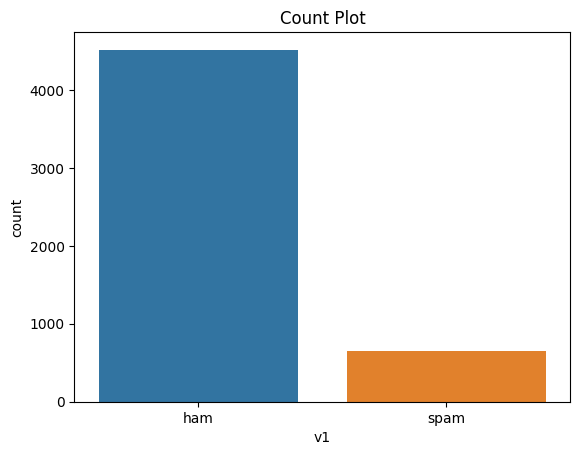

In [13]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [14]:
df.corr()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_11920\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


""


In [15]:
df['spam']=df.v1.apply(lambda x:1 if x=='spam' else 0)

C:\Users\Pavan\AppData\Local\Temp\ipykernel_11920\3849934502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spam']=df.v1.apply(lambda x:1 if x=='spam' else 0)


In [16]:
df.drop('Spam',axis=1,inplace=True)

KeyError: "['Spam'] not found in axis"

In [17]:
df

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [18]:
df.drop('v1',axis=1,inplace=True)

C:\Users\Pavan\AppData\Local\Temp\ipykernel_11920\3272326290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('v1',axis=1,inplace=True)


In [19]:
df

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [20]:
X=df['v2']
y=df['spam']

# Split Data to Train and Test Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Extraction - TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer()

# Model Evaluation

In [25]:
from sklearn.pipeline import Pipeline

# Navie Bayes Algorithm

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',MultinomialNB())])

In [28]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

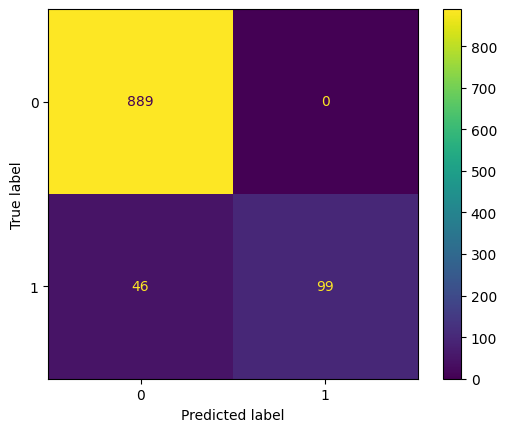

In [31]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [33]:
navie_bayes = accuracy_score(y_test,predictions)
print(navie_bayes)

0.9555125725338491


# Logistic Regression Algorithm

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr =  Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LogisticRegression())])

In [36]:
lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [37]:
pred = lr.predict(X_test)

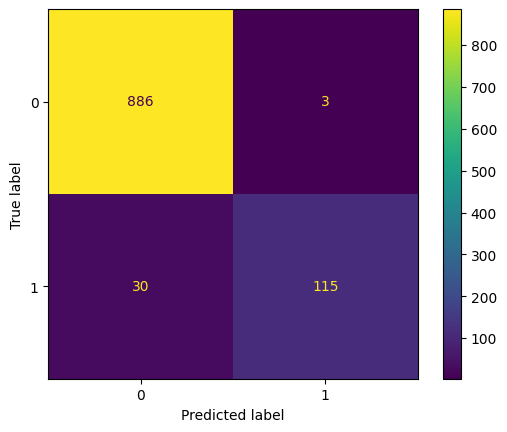

In [38]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [40]:
logistic_regression = accuracy_score(y_test,pred)
print(logistic_regression)

0.9680851063829787


# Support Vector Machines Algorithm

In [41]:
from sklearn.svm import LinearSVC

In [42]:
svc =  Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())])

In [43]:
svc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [44]:
y_pred = svc.predict(X_test)

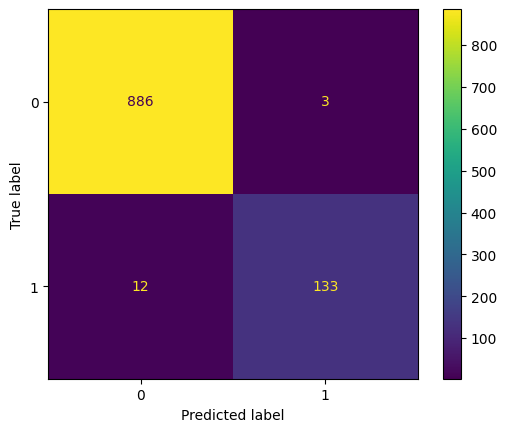

In [45]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.98      0.92      0.95       145

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [47]:
linear_svm = accuracy_score(y_test,y_pred)
print(linear_svm)

0.9854932301740812


# Visulization on Results

In [48]:
Data = {'algo':['navie_bayes','logistic_regression','linear_svm'],
       'accuracy':[95.5,96.80,98.549]}
df1 = pd.DataFrame(Data)
df1

,algo,accuracy
0,navie_bayes,95.500
1,logistic_regression,96.800
2,linear_svm,98.549


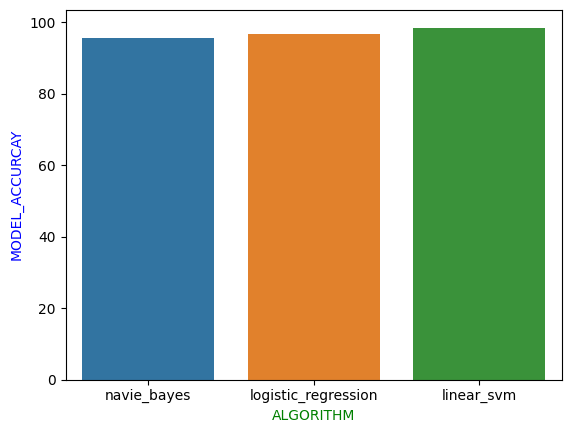

In [49]:
sns.barplot(x='algo',y='accuracy',data=df1)
plt.xlabel('ALGORITHM',color='g')
plt.ylabel('MODEL_ACCURCAY',color='b')
plt.show()